In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

분석 전 게임 정보
- 경매장에서 거래되는 아이템들이 다른 서버 유저와 거래 가능 -> 서버 별 df 분리 X
- 직업 별 착용 아이템이 다름 -> 직업 별로 df 분리

## 유저 정보 데이터 전처리
- 'slotId'
- 'slotName'
- 'itemId'
- 'itemName'
- 'clone_itemId'
- 'clone_itemName'


파츠 속성 중 6개 속성 선정</br>
12개의 파츠에 적용

### 데이터 불러오기

In [82]:
user1 = pd.read_csv("user1.csv")
user2 =pd.read_csv("user2.csv")
user3 =pd.read_csv("user3.csv")

user = pd.concat([user1,user2,user3],ignore_index=True)
del user1,user2,user3

In [83]:
output1 = pd.read_csv("output1.csv")
output2 =pd.read_csv("output2.csv")
output3 =pd.read_csv("output3.csv")

data = pd.concat([output1,output2,output3],ignore_index=True)

# data = data.drop('Unnamed: 0', axis=1)

del output1,output2,output3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15120\2480974654.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15120\2480974654.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output3 =pd.read_csv("output3.csv")


### 칼럼명 정의

In [5]:
name = ['HEADGEAR'
,'HAIR'
,'FACE'
,'JACKET'
,'PANTS'
,'SHOES'
,'BREAST'
,'WAIST'
,'SKIN'
,'AURORA'
,'WEAPON'
,'AURA_SKIN']

In [85]:
columns = [
    'characterId',
'characterName',
'jobId',
'jobName',
'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',

'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',

'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',

'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',

'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',

'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',

'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',

'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',

'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',

'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',

'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',

'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',

'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName',
]

### 데이터 전처리

In [86]:
user = user[['serverId','characterId','characterName','fame']]
user

,serverId,characterId,characterName,fame
0,anton,150a23219a59e086e36db59028c06a50,헤롱카테,66993
1,hilder,0daa8c49cae531262f966dd637008e30,민트크림소스,66787
2,anton,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,66702
3,prey,3ba38c77f2868f34d910e362d0f4cae1,프라디지,66666
4,diregie,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,66660
...,...,...,...,...
90595,hilder,5c37706a64742ce164d02b06456ec3d9,윤아에용,60468
90596,cain,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,60468
90597,prey,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,60468
90598,prey,9c068b798696f994d39b14a0840abb10,찌뮤,60468


In [87]:
data = data[columns]
data

,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_itemId,WEAPON__avatar_itemName,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,NaN,NaN
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,6f664071d276072fdc25371252816989,레어 무기 클론 아바타[75Lv],f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,dd013289916783dddc5a90f378682e40,레어 무기 클론 아바타[80Lv],d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,NaN,NaN
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,7b0532818737be0b0e6f1e2c4042cf60,레어 무기 클론 아바타[75Lv],a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,NaN,NaN
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,NaN,NaN,...,f99c56e62fa39e93ec0f1fe793ccf05c,레어 무기 클론 아바타[45Lv],6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90595,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,5c94117f7b5b2232b776011cfa42579e,무기 클론 아바타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90596,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,ccde39545f0f69b26e9f6b23f41751a0,레어 무기 클론 아바타[70Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90597,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90598,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,f17318c539c39d6b6505462c13acc733,레어 무기 클론 아바타[60Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN


In [88]:
df = pd.concat([data,user[['serverId','fame']]], axis=1)

In [89]:
del user, data

### 이상치 검색

#### 1. characterName이 없는 데이터

In [64]:
df['characterName'].isnull().sum()

2

In [91]:
df['serverId'].isnull().sum()

0

In [92]:
df['characterName'].isnull().sum()

2

In [65]:
for i in tqdm(range(len(df))):
    if df['characterName'].isnull()[i]:
        print(i)

 22%|██▏       | 20182/90600 [00:57<03:16, 358.52it/s]

20141


 86%|████████▋ | 78300/90600 [03:40<00:34, 358.49it/s]

78245


100%|██████████| 90600/90600 [04:13<00:00, 357.74it/s]


In [90]:
df.iloc[20141,]

characterId                           NaN
characterName                         NaN
jobId                                 NaN
jobName                               NaN
HEADGEAR__avatar_slotId               NaN
                                    ...  
AURA_SKIN__avatar_itemName            NaN
AURA_SKIN__avatar_clone_itemId        NaN
AURA_SKIN__avatar_clone_itemName      NaN
serverId                             cain
fame                                61963
Name: 20141, Length: 78, dtype: object

In [95]:
df.iloc[78245,]

characterId                         1fd51627e5d6e46d15da14dcf2b0361b
characterName                                                 이름뿐인리더
jobId                               41f1cdc2ff58bb5fdc287be0db2a8df3
jobName                                                       귀검사(남)
HEADGEAR__avatar_slotId                                     HEADGEAR
                                                  ...               
AURA_SKIN__avatar_itemName                                조화가 무너진 기억
AURA_SKIN__avatar_clone_itemId                                   NaN
AURA_SKIN__avatar_clone_itemName                                 NaN
serverId                                                        prey
fame                                                           60619
Name: 78247, Length: 78, dtype: object

In [94]:
df.drop([20141,78245], axis=0, inplace=True)

>> api로 받아오는 과정 사이 캐릭터 삭제 추정 (2개) -> 데이터 삭제

#### 2. 중복 데이터

In [96]:
df.duplicated(['characterId']).sum()

9056

characterId가 같은데 서버가 다른 데이터 존재

In [98]:
df.duplicated().sum()

9004

명성차이가 존재하고 나머지 칼럼은 동일한 경우 존재

In [97]:
df.duplicated(['characterId', 'serverId']).sum()

9009

'characterId', 'serverId'을 기준으로 데이터 제거

In [99]:
user_avatar_table = df.drop_duplicates(subset = ['characterId', 'serverId'] , keep = 'first' ,ignore_index = True)

In [102]:
user_avatar_table.duplicated().sum()

0

### 직업별 df 분리
- '다크나이트' 와 '귀검사(남)' , '크리에이터' 와 '마법사(여)' 는 아바타를 같은 것 사용
- 오라는 직업 구분 없음


In [103]:
jobdf = user_avatar_table['jobName'].value_counts()
jobdf=jobdf.sort_index()
jobdf

jobName
거너(남)       5207
거너(여)       3534
격투가(남)      1973
격투가(여)      5054
귀검사(남)      8588
귀검사(여)      9239
나이트         2914
다크나이트        503
도적          2221
마법사(남)      1978
마법사(여)     11615
마창사         1558
아처         10601
총검사         1929
크리에이터        266
프리스트(남)     5474
프리스트(여)     8935
Name: count, dtype: int64

#### 직업별 분포

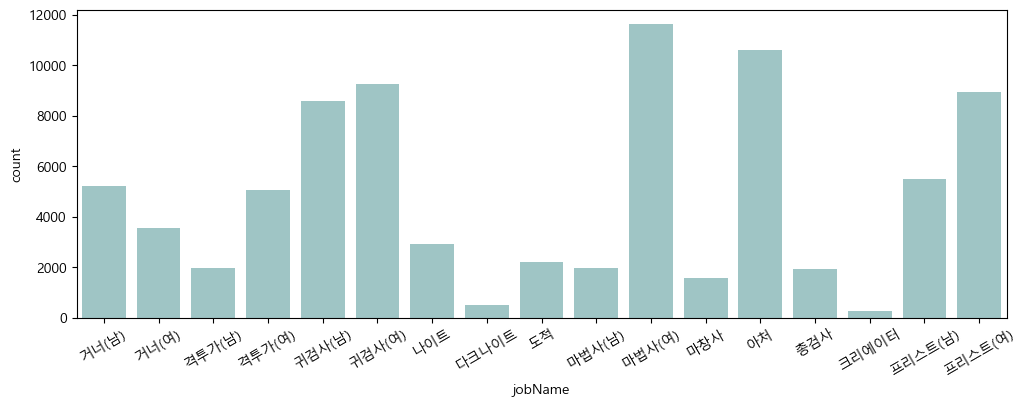

In [113]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=jobdf, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

여성 캐릭터의 비율이 높은 것으로 확인이 됨<br>
여성 캐릭터의 아바타의 인기가 높다는 추정을 하여 추후 아바타의 거래량과 시세를 통해 인기의 척도를 확인할 예정

#### 직업별 명성

In [105]:
user_avatar_table['fame'].mean()

61497.63079581806

In [106]:
user_avatar_table.groupby("jobName")['fame'].max().sort_values()

jobName
다크나이트      65938
크리에이터      65954
마법사(남)     66215
총검사        66237
마창사        66303
격투가(남)     66305
거너(여)      66317
나이트        66382
귀검사(여)     66386
격투가(여)     66402
프리스트(남)    66425
도적         66430
아처         66539
프리스트(여)    66660
귀검사(남)     66666
거너(남)      66702
마법사(여)     66993
Name: fame, dtype: int64

In [107]:
user_avatar_table.groupby("jobName")['fame'].mean().sort_values()

jobName
아처         61338.011320
프리스트(여)    61403.726245
마창사        61427.527599
총검사        61454.269051
프리스트(남)    61484.298502
격투가(여)     61499.138702
나이트        61502.678449
귀검사(여)     61511.884078
귀검사(남)     61539.501281
마법사(남)     61541.129424
마법사(여)     61542.595695
거너(여)      61576.944539
도적         61578.837461
격투가(남)     61603.283832
크리에이터      61662.488722
거너(남)      61665.202036
다크나이트      61675.759443
Name: fame, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15120\785365589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_avatar_table.sort_values(by='jobName' ,ascending=True), x='jobName', y='fame', palette = 'Set3')


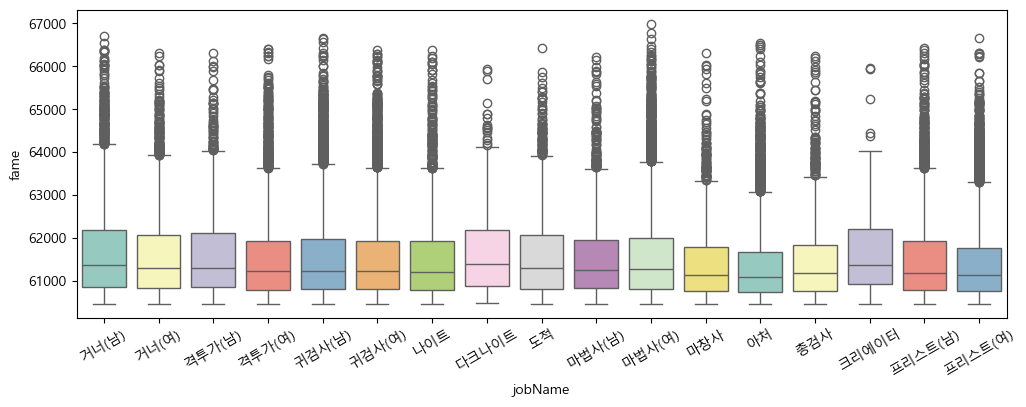

In [116]:
plt.figure(figsize=(12,4))
sns.boxplot(data=user_avatar_table.sort_values(by='jobName' ,ascending=True), x='jobName', y='fame', palette = 'Set3')
plt.xticks(rotation=30)
plt.show()

중간값과 25%~75%의 값들은 상대적으로 비슷한 수준을 띄고 있으나 최댓값들의 차이가 존재함을 알 수 있음</br>
유저 수가 적은 직업들의 명성 최댓값이 높은 것을 확인 할 수 있음</br>


In [117]:
joblist = list(df['jobName'].unique())


거너(남) : GunnerM</br>
거너(여) : GunnerW</br>
격투가(남) : FighterM</br>
격투가(여) : FighterW</br>
귀검사(남) : Ghost KnightM</br>
귀검사(여) : Ghost KnightW</br>
나이트 : Knight</br>
다크나이트 : Dark Knight</br>
도적 : Thief</br>
마법사(남) : MageM</br>
마법사(여) : MageW</br>
마창사 : Demonic Lancer</br>
아처 : Archer</br>
총검사 : Gunblader</br>
크리에이터 : Creator</br>
프리스트(남) : PriestM</br>
프리스트(여) : PriestW</br>

In [119]:
GunnerM = user_avatar_table[user_avatar_table['jobName']=='거너(남)']
GunnerW = user_avatar_table[user_avatar_table['jobName']=='거너(여)']
FighterM = user_avatar_table[user_avatar_table['jobName']=='격투가(남)']
FighterW = user_avatar_table[user_avatar_table['jobName']=='격투가(여)']
GhostknightM = user_avatar_table[user_avatar_table['jobName']=='귀검사(남)']
GhostknightW = user_avatar_table[user_avatar_table['jobName']=='귀검사(여)']
Knight = user_avatar_table[user_avatar_table['jobName']=='나이트']
Darkknight = user_avatar_table[user_avatar_table['jobName']=='다크나이트']
Thief = user_avatar_table[user_avatar_table['jobName']=='도적']
MageM = user_avatar_table[user_avatar_table['jobName']=='마법사(남)']
MageW = user_avatar_table[user_avatar_table['jobName']=='마법사(여)']
Demoniclancer = user_avatar_table[user_avatar_table['jobName']=='마창사']
Archer = user_avatar_table[user_avatar_table['jobName']=='아처']
Gunblader = user_avatar_table[user_avatar_table['jobName']=='총검사']
Creator = user_avatar_table[user_avatar_table['jobName']=='크리에이터']
PriestM = user_avatar_table[user_avatar_table['jobName']=='프리스트(남)']
PriestW = user_avatar_table[user_avatar_table['jobName']=='프리스트(여)']

In [77]:
a="GunnerM,GunnerW,FighterM,FighterW,GhostknightM,GhostknightW,Knight,Darkknight,Thief,MageM,MageW,Demoniclancer,Archer,Gunblader,Creator,PriestM,PriestW"
jobname = a.split(",")

In [78]:
jobname

['GunnerM',
 'GunnerW',
 'FighterM',
 'FighterW',
 'GhostknightM',
 'GhostknightW',
 'Knight',
 'Darkknight',
 'Thief',
 'MageM',
 'MageW',
 'Demoniclancer',
 'Archer',
 'Gunblader',
 'Creator',
 'PriestM',
 'PriestW']

In [76]:
jobdf_list = [GunnerM,
GunnerW,
FighterM,
FighterW,
GhostknightM,
GhostknightW,
Knight,
Darkknight,
Thief,
MageM,
MageW,
Demoniclancer,
Archer,
Gunblader,
Creator,
PriestM,
PriestW,]

### 유저가 착용 중인 아이템 확인

In [80]:
data['HEADGEAR__avatar_itemId'].value_counts().index

Index(['2defdc2422ff3c61f5ac1af583e79459', '92d9839ad426f31e9de3508d001f84ca',
       '4073653019b52f859d27c96265c0b0a3', 'c90044ec63bf1520c5bc4a9385ff466d',
       '3bd48b7a41985ad02bd07ec91dcf04a8', 'b8c1f046fe4fe0677f19195385d19b04',
       '80c6a6b7b5c1ab32bb401dfadf76ace8', 'b8719abf78adc19335324f5a36f5987c',
       'c8032d3f73fee655c33b30444ddd1eaa', '851f5dae01e9ed0597e533cd78700f00',
       ...
       'f76b941c0987e0de56117287ce33d45d', '6996eec45d98d7e165f4cd9524adc34a',
       '27acdd98f35020c744eb046aea20099c', '760540ccbcfe523bd263b64b9405b87b',
       '3c2eaa4f26d8e8a5417c9a4facd256b6', '04e2f6736e60cba84eb7b5e243f4996c',
       '5da9726e0af825587b53165d4f798feb', '0dccbc01bf82e6fe94fb9349874591e3',
       'f0a36e1ed531243c2bc177edb6bfd009', '1e9711921844b0934ab0304dd49335ed'],
      dtype='object', name='HEADGEAR__avatar_itemId', length=656)

In [81]:
data['HEADGEAR__avatar_itemName'].value_counts()

HEADGEAR__avatar_itemName
레어 모자 클론 아바타                84177
주황색 제복모                       306
신성한 은여우 전사의 투구                275
검은색 악마뿔                       207
블랙크로우 투구                      147
                            ...  
노블레스 화이트 크로스 투구                 1
원탁의 기사 아서왕의 실버 왕관[C타입]          1
우아한 나비 숙녀의 나비 헤어 장식[E타입]        1
반투 얼음조각 장식                      1
진 디멘션워커의 무늬 타투[B타입]             1
Name: count, Length: 439, dtype: int64

In [79]:
for i in range(len(jobdf_list)):
    print(jobname[i])
    print(len(jobdf_list[i]['HEADGEAR__avatar_itemId'].value_counts().index))
    print(len(jobdf_list[i]['HEADGEAR__avatar_itemName'].value_counts()))

GunnerM
53
40
GunnerW
38
29
FighterM
36
29
FighterW
47
34
GhostknightM
70
51
GhostknightW
42
33
Knight
30
25
Darkknight
23
19
Thief
28
24
MageM
38
33
MageW
82
67
Demoniclancer
25
20
Archer
17
15
Gunblader
18
14
Creator
22
19
PriestM
71
57
PriestW
61
53


>> itemName이 같지만 itemId가 다른 경우가 존재